<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Информация-об-исследовании-и-обрабатываемых-данных" data-toc-modified-id="Информация-об-исследовании-и-обрабатываемых-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Информация об исследовании и обрабатываемых данных</a></span></li><li><span><a href="#Визуализации" data-toc-modified-id="Визуализации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Визуализации</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Механика-игры" data-toc-modified-id="Механика-игры-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Механика игры</a></span></li><li><span><a href="#Показатели-эффективности-рекламы." data-toc-modified-id="Показатели-эффективности-рекламы.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Показатели эффективности рекламы.</a></span></li></ul></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез.</a></span><ul class="toc-item"><li><span><a href="#Время-завершения-уровня-различается-в-зависимости-способа-прохождения:-через-реализацию-проекта-либо-через-победу-над-первым-игроком." data-toc-modified-id="Время-завершения-уровня-различается-в-зависимости-способа-прохождения:-через-реализацию-проекта-либо-через-победу-над-первым-игроком.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта либо через победу над первым игроком.</a></span></li><li><span><a href="#Количество-построенных-зданий-различается-для-пользователей,-пришедших-из-yandex-direct-и-из-instagram." data-toc-modified-id="Количество-построенных-зданий-различается-для-пользователей,-пришедших-из-yandex-direct-и-из-instagram.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Количество построенных зданий различается для пользователей, пришедших из yandex direct и из instagram.</a></span></li></ul></li><li><span><a href="#Выводы-об-эффективности-источников-привлечения." data-toc-modified-id="Выводы-об-эффективности-источников-привлечения.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы об эффективности источников привлечения.</a></span></li><li><span><a href="#Выводы-и-рекомендации." data-toc-modified-id="Выводы-и-рекомендации.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы и рекомендации.</a></span></li></ul></div>

## Информация об исследовании и обрабатываемых данных

Задача настоящего исследования - анализ поведения игроков мобильной игры в зависимости от источника перехода в игру.

**Данные представлены следующими датасетами с информацией об игре пользователей на первых уровнях и рекламных активностях**

Датасет `game_actions` - данные когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно:
1. event_datetime — время события;
2. event — одно из трёх событий:
    * building — объект построен,
    * finished_stage_1 — первый уровень завершён,
    * project — проект завершён;
3. building_type — один из трёх типов здания:
    * assembly_shop — сборочный цех,
    * spaceport — космопорт,
    * research_center — исследовательский центр;
4. user_id — идентификатор пользователя;
5. project_type — тип реализованного проекта;

Датасет `ad_cost`:
1. day - день, в который был совершен клик по объявлению
2. source - источник трафика
3. cost - стоимость кликов

Датасет `user_source`:
1. user_id - идентификатор пользователя
2. source - источник, с которого пришёл пользователь, установивший приложение.

В результате исследования будут сделаны выводы об особенностях поведения игроков, проходящих игру различными способами, и даны рекомендации по корректировке рекламных активностей.

## Визуализации

[Дашборд](https://public.tableau.com/views/Mobilegame/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

[Презентация](https://disk.yandex.com/d/-3UyJs1J4JIqVA)

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

In [2]:
ad_costs, game_actions, user_source = map(
    pd.read_csv, ['/datasets/ad_costs.csv',
                  '/datasets/game_actions.csv',
                  '/datasets/user_source.csv'])

In [3]:
def study(df):
    display(
        df.info(),
        df.head(5),
        df.describe()
    )
    print('Количество дубликатов:', df.duplicated().sum())
    print()

Для большей наглядности выведем информацию о каждом датасете по отдельности.

In [4]:
study(game_actions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


None

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-08 22:30:04,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


Количество дубликатов: 1



In [5]:
study(ad_costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


Количество дубликатов: 0



In [6]:
study(user_source)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


None

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


,user_id,source
count,13576,13576
unique,13576,4
top,a5303375-175a-46bf-b0b8-7ceb1229cb27,yandex_direct
freq,1,4817


Количество дубликатов: 0



## Предобработка данных

На этом этапе удалим дубликат из таблицы game_actions и переведем в формат datetime данные в столбцах с датами.

In [7]:
game_actions = game_actions.drop_duplicates()

In [8]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime']).dt.normalize()
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

for table in game_actions, ad_costs:
    print(table.info())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes
None



Пропуски есть только с толбцах с типом здания и типом проекта в таблице game_actions. Проверим, есть ли смысл их заполнять. Там, где здания не строились, событием может считаться завершенный проект. Если в строке нет типа здания и нет данных о завершении проекта - информация заполнена с ошибкой.

In [9]:
game_actions.loc[(game_actions['building_type'].isnull())&(game_actions['event'].isnull())]

,event_datetime,event,building_type,user_id,project_type


Таких строк нет, значит в заполнении данных пропусков нет необходимости.

## Исследовательский анализ данных

Рассчитаем метрики по 2 основным категориям вопросов.

### Механика игры

**Количество пользователей с разбивкой по дням**

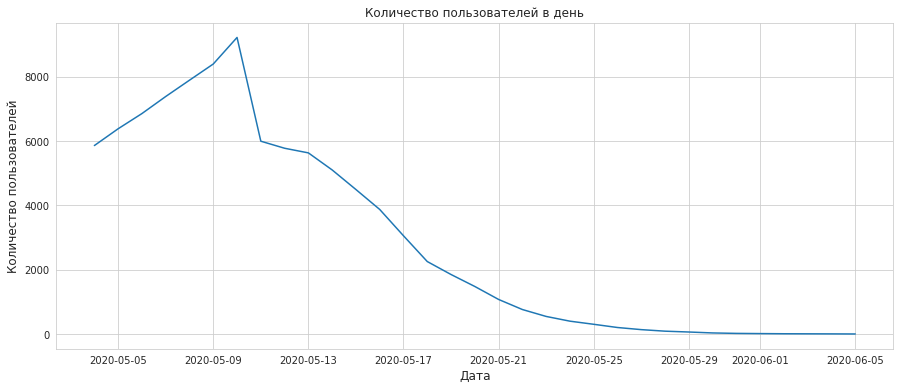

In [10]:
users_per_day = (game_actions[['event_datetime', 'user_id']]
                 .groupby('event_datetime')
                 .agg({'user_id': 'nunique'}))
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=users_per_day, x='event_datetime', y='user_id')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество пользователей', size=12)
plt.title('Количество пользователей в день', size=12)
plt.show()

К концу исследуемого периода количество пользователей снижается до нуля.

**Количество событий с разбивкой по дням**

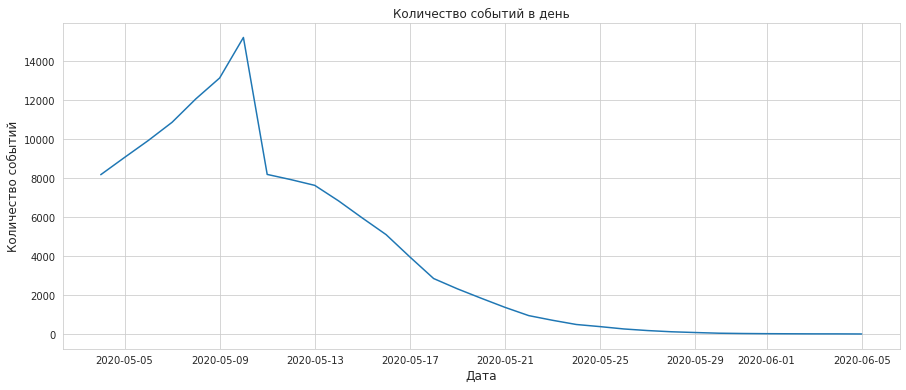

In [11]:
events_per_day = (game_actions[['event_datetime', 'event']]
                  .groupby('event_datetime')
                  .agg({'event': 'count'}))
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=events_per_day, x='event_datetime', y='event')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество событий', size=12)
plt.title('Количество событий в день', size=12)
plt.show()

Здесь тоже заметен рост в первые дни, а затем снижение количества событий. Сравним два графика, чтобы понимать, совпадают ли моменты их роста и снижения.

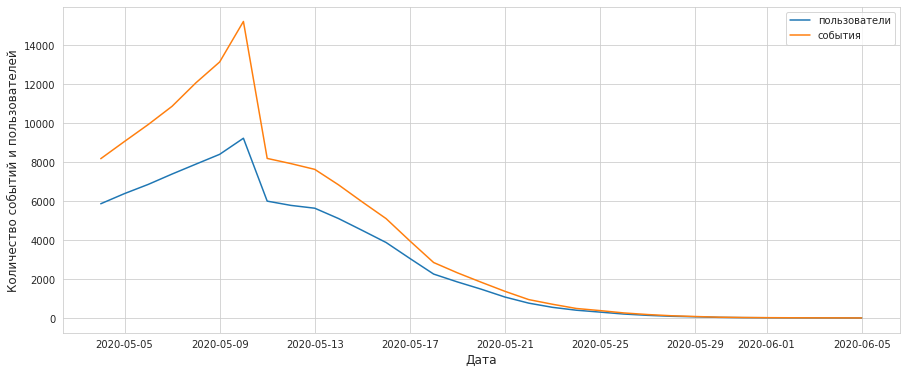

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
ax= sns.lineplot(data=users_per_day, x='event_datetime', y='user_id', label = 'пользователи')
ax1 = sns.lineplot(data=events_per_day, x='event_datetime', y='event', label = 'события')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество событий и пользователей', size=12)
plt.show()

Можно видеть, что количество событий обусловлено количеством пользователей: растут и снижаются значения графиков одновременно при этом пользователей меньше, чем событий.

**Среднее количество событий на пользователя**

In [13]:
actions_per_user = int(game_actions.groupby('user_id').agg({'event': 'count'}).mean())
print(f'''На одного пользователя приходится в среднем {actions_per_user} событий''')

На одного пользователя приходится в среднем 9 событий


**Количество построенных зданий**

Сначала выведем количество построенных зданий по дням. Можно предположить, что график будет совпадать по форме с двумя предыдущими. Построим сразу график с количеством зданий и событий для сравнения.

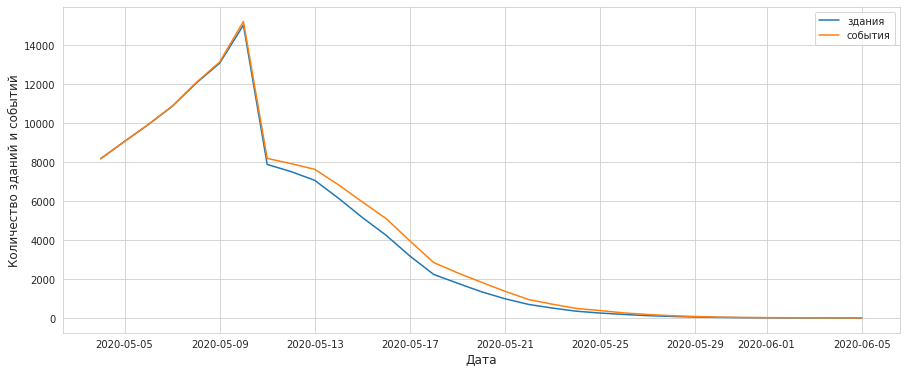

In [14]:
buildings_per_day = (game_actions[['event_datetime', 'building_type']]
                  .groupby('event_datetime')
                  .agg({'building_type': 'count'}))
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(data=buildings_per_day, x='event_datetime', y='building_type', label = 'здания')
ax1 = sns.lineplot(data=events_per_day, x='event_datetime', y='event', label = 'события')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество зданий и событий', size=12)
plt.show()

Подавляющее большинство событий - постройка зданий, в первые дни графики совпадают, что логично - без зданий невозможно эффективно продолжать игру.

Теперь посмотрим, какие именно здания предпочитают строить пользователи.

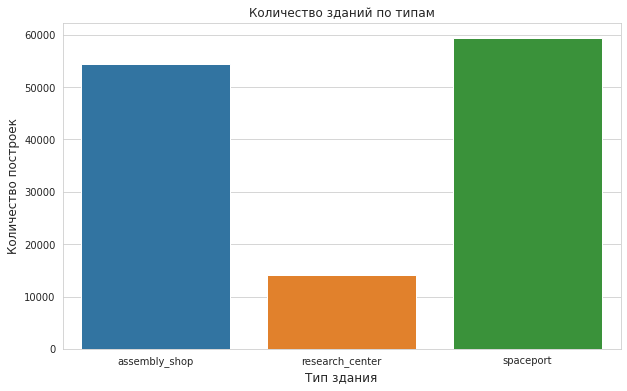

In [15]:
number_of_buildings = (game_actions[['building_type', 'user_id']]
                       .groupby('building_type')
                       .agg({'user_id': 'count'})
                       .reset_index())
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='building_type', y='user_id', data=number_of_buildings)
plt.xlabel('Тип здания', size=12)
plt.ylabel('Количество построек', size=12)
plt.title('Количество зданий по типам', size=12)
plt.show()

Исследовательских центров строят значительно меньше. Можно предположить, что они нужны для завершения проекта, в то время как остальные 2 типа зданий как для развития, так и для ведения войны. Очень интересно посмотреть распределение зданий по дням, чтобы лучше понимать их назначение.

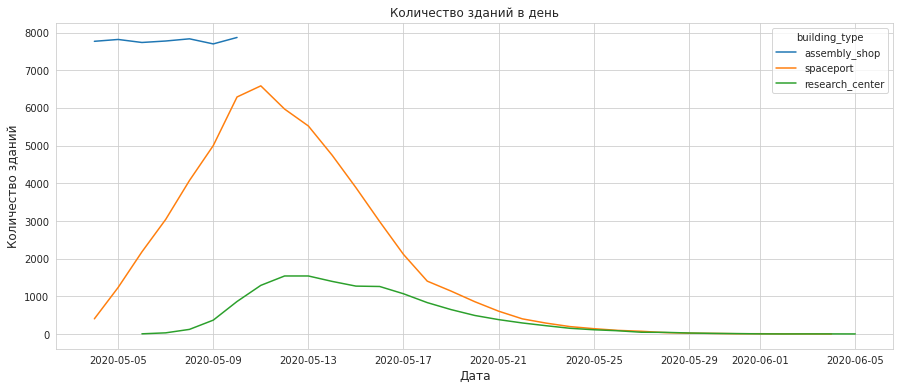

In [16]:
building_types_per_day = (game_actions[['event_datetime', 'building_type', 'user_id']]
                       .groupby(['event_datetime','building_type'])
                       .agg({'user_id': 'count'})
                       .reset_index())
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=building_types_per_day, x='event_datetime', y='user_id', hue='building_type')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество зданий', size=12)
plt.title('Количество зданий в день', size=12)
plt.show()

Очевидно обязательным типом здания является мастерская, которые все строят в большом количестве в начале игры, а исследовательский центр важен для завершения проекта.

**Изучим количество зданий в разных группах пользователей**

Создадим столбец со стратегией прохождения и сравним количество зданий. Для этого создадим списки пользователей, завершивших проект и прошедших уровень, но проект не строивших (а значит убивших врага). Затем добавим в таблицу с пользовательскими сессиями новый столбец со стратегией прохождения.

In [17]:
project_completed = (game_actions
                     .loc[game_actions['event']=='project']
                     ['user_id']
                     .unique().tolist())
finished_stage_one = (game_actions
                     .loc[game_actions['event']=='finished_stage_1']
                     ['user_id']
                     .unique().tolist())

In [18]:
def conditions(df):
    if df['user_id'] in project_completed:
        return 'pve'
    elif df['user_id'] in finished_stage_one and df['user_id'] not in project_completed:
        return 'pvp'
    else:
        return 'in_progress'

In [19]:
game_actions['strategy'] = game_actions.apply(conditions, axis=1)

In [20]:
game_actions.head(5)

,event_datetime,event,building_type,user_id,project_type,strategy
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,in_progress
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,pve
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,pvp
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,in_progress
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,pvp


Сгруппируем данные для построения графика.

In [21]:
data = (game_actions
        .groupby(['strategy', 'building_type'])
        .agg({'user_id': ['nunique', 'count']})
       )
data.columns = data.columns.droplevel()
data['mean'] = round(data['count']/data['nunique'], 2)
data = data.reset_index()
data

,strategy,building_type,nunique,count,mean
0,in_progress,assembly_shop,7759,29080,3.75
1,in_progress,research_center,3463,6685,1.93
2,in_progress,spaceport,7471,31405,4.20
3,pve,assembly_shop,1866,9116,4.89
4,pve,research_center,1866,3697,1.98
5,pve,spaceport,1866,10788,5.78
6,pvp,assembly_shop,3951,16298,4.13
7,pvp,research_center,2342,3755,1.60
8,pvp,spaceport,3894,17132,4.40


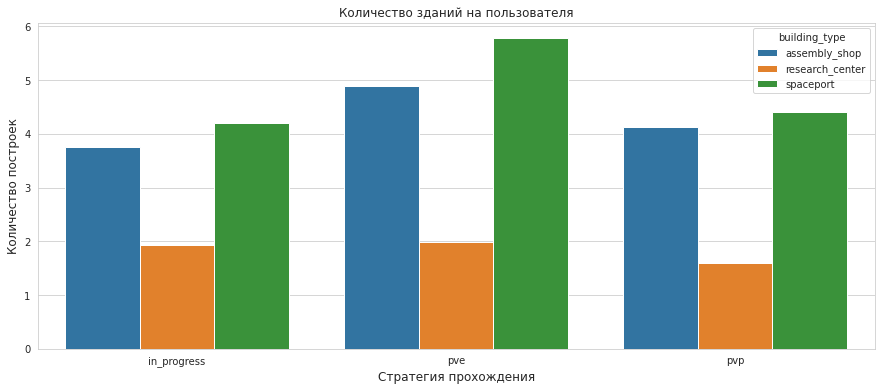

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='strategy', y='mean', hue='building_type', data=data)
plt.xlabel('Стратегия прохождения', size=12)
plt.ylabel('Количество построек', size=12)
plt.title('Количество зданий на пользователя', size=12)
plt.show()

In [23]:
data.groupby(['strategy']).agg({'mean':'sum'}).reset_index()

,strategy,mean
0,in_progress,9.88
1,pve,12.65
2,pvp,10.13


Как можно видеть, пользователи, не закончившие задания 1 уровня, строят в среднем меньше зданий.

### Показатели эффективности рекламы.

Для последующих расчетов стоимости привлечения необходимо добавить столбец с информацией о первой активности пользователя в игре.

In [24]:
first_activity = game_actions.groupby(['user_id'])['event_datetime'].min()
user_source = user_source.join(first_activity, on='user_id')
user_source = user_source.rename(columns={'event_datetime':'first_activity'})
user_source.head(5)

,user_id,source,first_activity
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,2020-05-05


**Количество пользователей по каждому источнику рекламы**

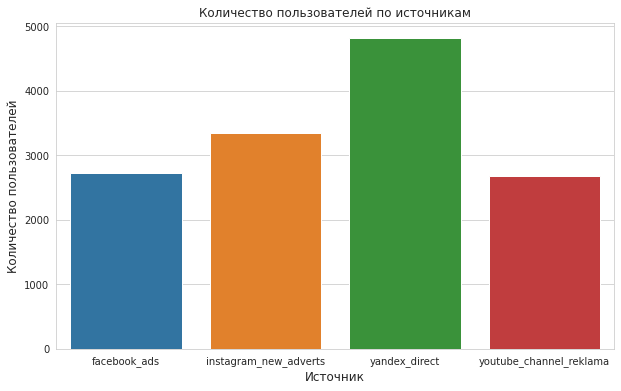

In [25]:
users_per_source = (user_source.groupby(['source'])
                    .agg({'user_id':'count'})
                    .reset_index())
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='source', y='user_id', data=users_per_source)
plt.xlabel('Источник', size=12)
plt.ylabel('Количество пользователей', size=12)
plt.title('Количество пользователей по источникам', size=12)
plt.show()

Больше всего пользователей приходит из yandex direct.

**Стоимость привлечения пользователя**

Подсчитаем количество пользователей в день по источникам. Создадим столбец с датой затрат на рекламу.

In [26]:
users_per_day = (user_source
                 .groupby(['first_activity', 'source'])
                 .agg({'user_id': 'nunique'})
                 .reset_index()
                 .rename(columns={'user_id': 'users_cnt'})
                )
users_per_day['payment_dt'] = users_per_day['first_activity'] - pd.Timedelta(days=1)
users_per_day.head(5)

,first_activity,source,users_cnt,payment_dt
0,2020-05-04,facebook_ads,1184,2020-05-03
1,2020-05-04,instagram_new_adverts,1452,2020-05-03
2,2020-05-04,yandex_direct,2078,2020-05-03
3,2020-05-04,youtube_channel_reklama,1146,2020-05-03
4,2020-05-05,facebook_ads,694,2020-05-04


Объединим результат с таблицой стоимости кликов по рекламе. Сгруппируем объединенную таблицу, добавим столбец с расчетом стоимости привлечения пользователя.

In [27]:
costs_per_source = (pd.merge(ad_costs, users_per_day,
                             how='left',
                             left_on=['day','source'], right_on = ['payment_dt','source'])
                    .groupby('source').agg({'cost':'sum', 'users_cnt':'sum'})
                    .reset_index()
                   )
costs_per_source['cost'] = round(costs_per_source['cost'], 3)
costs_per_source['CAC'] = round(costs_per_source['cost'] / costs_per_source['users_cnt'], 3)
display(costs_per_source)
print()
print('Средний CAC:', round(costs_per_source['CAC'].mean(), 2))

,source,cost,users_cnt,CAC
0,facebook_ads,2140.905,2726,0.785
1,instagram_new_adverts,2161.442,3347,0.646
2,yandex_direct,2233.111,4817,0.464
3,youtube_channel_reklama,1068.119,2686,0.398



Средний CAC: 0.57


Построим еще один график для наглядности.

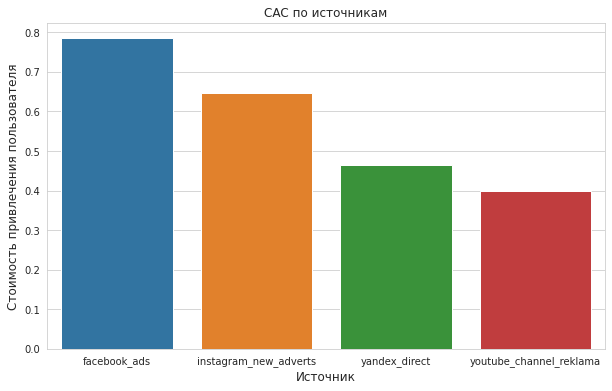

In [28]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='source', y='CAC', data=costs_per_source)
plt.xlabel('Источник', size=12)
plt.ylabel('Стоимость привлечения пользователя', size=12)
plt.title('CAC по источникам', size=12)
plt.show()

Ниже всех стоимость у рекламы на youtube, но как мы помним, оттуда и пользователей приходит меньше. Поэтому самым выгодным выглядит yandex direct. Что касается youtube, целесообразно продумать, как увеличить эффективность привлечения целевой аудитории по этому каналу.

## Проверка гипотез.

### Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта либо через победу над первым игроком.

В данном случае сравниваются средние двух генеральных совокупностей: пользователи, прошедшие 1 уровень разными способами, поэтому применим Т-тест. Критический уровень статистической значимости примем равным 5%.

Сформулируем гипотезы:
* H0 - среднее время прохождения первого уровня игроками, реализующими проект и воюющими, одинаковое
* H1 - среднее время прохождения первого уровня игроками, реализующими проект и воюющими, различается

Выше уже были подготовлены таблицы с пользователями, победившими врага и завершившими проект. Можно ими воспользоваться. Удалим из них события постройки зданий, добавим столбец с датой начала игры и столбец с временем прохождения.

In [29]:
first_activity.name = 'first_activity'
game_actions = game_actions.join(first_activity, on='user_id')
game_actions.head(5)

,event_datetime,event,building_type,user_id,project_type,strategy,first_activity
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,in_progress,2020-05-04
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,pve,2020-05-04
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,pvp,2020-05-04
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,in_progress,2020-05-04
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,pvp,2020-05-04


In [30]:
project_completed = (game_actions
                     .query("strategy=='pve' and event=='project'")
                    )
project_completed['walkthrough_days'] = (project_completed['event_datetime'] - project_completed['first_activity']).dt.days
project_completed.head(5)

,event_datetime,event,building_type,user_id,project_type,strategy,first_activity,walkthrough_days
47121,2020-05-08,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly,pve,2020-05-04,4
57398,2020-05-09,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly,pve,2020-05-04,5
58797,2020-05-09,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly,pve,2020-05-04,5
61174,2020-05-09,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly,pve,2020-05-05,4
63770,2020-05-10,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly,pve,2020-05-04,6


Для победы над врагом нет отдельного события. Поэтому придется использовать событие завершения уровня, хотя оно, судя по всемму, происходит не автоматически.

In [31]:
enemy_defeated = (game_actions
                  .query("strategy=='pvp' and event=='finished_stage_1'")
                 )
enemy_defeated['walkthrough_days'] = (enemy_defeated['event_datetime'] - enemy_defeated['first_activity']).dt.days
enemy_defeated.head(5)

,event_datetime,event,building_type,user_id,project_type,strategy,first_activity,walkthrough_days
6659,2020-05-04,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,pvp,2020-05-04,0
13134,2020-05-05,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,pvp,2020-05-04,1
15274,2020-05-05,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,pvp,2020-05-04,1
16284,2020-05-05,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,pvp,2020-05-04,1
19650,2020-05-06,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,pvp,2020-05-04,2


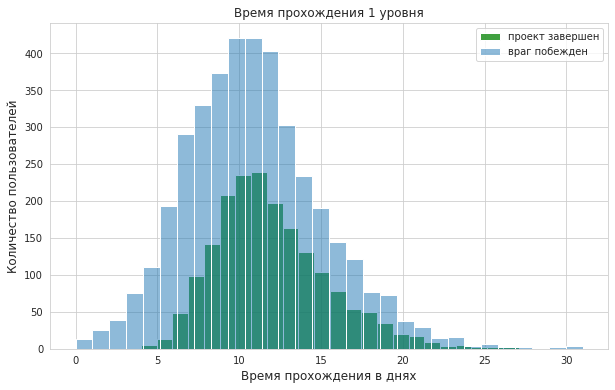

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=project_completed, x='walkthrough_days', bins=26, color='green', label = 'проект завершен')
sns.histplot(data=enemy_defeated, x='walkthrough_days', bins=30, alpha=0.5, label = 'враг побежден')
plt.xlabel('Время прохождения в днях', size=12)
plt.ylabel('Количество пользователей', size=12)
plt.title('Время прохождения 1 уровня', size=12)
plt.legend()
plt.show()

Судя по графику, пользователей, которые выбирают проходить уровень через победу над врагом, больше, но по форме распределения похожие. Проверим гипотезу с помощью Т-теста. Расчитаем дисперсии двух генеральных совокупностей, чтобы понять, равны они или нет.

In [33]:
print('Дисперсия для завершивших проект:', round(np.var(project_completed['walkthrough_days']), 2))
print('Дисперсия для победивших врага', round(np.var(enemy_defeated['walkthrough_days']), 2))

Дисперсия для завершивших проект: 13.33
Дисперсия для победивших врага 16.85


Поскольку дисперсии не равны, необходимо учесть это при проверке гипотезы.

In [35]:
alpha = .05

results = st.ttest_ind(
    project_completed['walkthrough_days'], 
    enemy_defeated['walkthrough_days'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.518879692328641e-13
Отвергаем нулевую гипотезу


Отсутствуют статистически значимые различия средних значений времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

### Количество построенных зданий различается для пользователей, пришедших из yandex direct и из instagram.

Сравним эти 2 источника, т.к. из них приходит больше всего пользователей, а стоимость привлечения через них средняя. 
В данном случае снова сравниваются средние двух генеральных совокупностей: пользователи, пришедшие из разных рекламных источников, поэтому применим Т-тест. Критический уровень статистической значимости примем равным 5%.

Сформулируем гипотезы:
* H0 - среднее количество зданий, построенных пользователями, привлеченными через yandex_direct и через instagram, одинаковое
* H1 - среднее количество зданий, построенных пользователями, привлеченными через yandex_direct и через instagram, разное

Объединим таблицы с игровыми сессиями и рекламными источниками. Оставим только события постройки зданий. Затем сгруппируем таблицу, подсчитав количество зданий для каждого пользователя.

In [36]:
events_and_source = pd.merge(game_actions, user_source, on=['user_id'], how='left')
events_and_source.head(5)

,event_datetime,event,building_type,user_id,project_type,strategy,first_activity_x,source,first_activity_y
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,in_progress,2020-05-04,youtube_channel_reklama,2020-05-04
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,pve,2020-05-04,facebook_ads,2020-05-04
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,pvp,2020-05-04,instagram_new_adverts,2020-05-04
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,in_progress,2020-05-04,facebook_ads,2020-05-04
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,pvp,2020-05-04,yandex_direct,2020-05-04


In [37]:
buildings_per_user = (events_and_source[['event_datetime', 'event', 'user_id', 'source']]
                      .loc[events_and_source['event']=='building']
                      .groupby(['event_datetime','user_id', 'source'])
                      .agg({'event': 'count'})
                      .reset_index())
buildings_per_user.head(5)

,event_datetime,user_id,source,event
0,2020-05-04,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct,3
1,2020-05-04,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads,2
2,2020-05-04,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads,1
3,2020-05-04,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct,1
4,2020-05-04,005ff87b-b475-4da7-862e-57ab91adbff4,youtube_channel_reklama,1


Сравним дисперсии для двух рекламных источников.

In [38]:
print('Дисперсия для yandex:', round(np.var
                                     (buildings_per_user
                                      .loc[buildings_per_user['source']=='yandex_direct']
                                      ['event']), 2))
print('Дисперсия для instagram', round(np.var(buildings_per_user
                                      .loc[buildings_per_user['source']=='instagram_new_adverts']
                                      ['event']), 2))

Дисперсия для yandex: 0.47
Дисперсия для instagram 0.47


Дисперсия одинаковая, можно не учитывать этот параметр при расчете.

In [39]:
data_1 = buildings_per_user.loc[buildings_per_user['source']=='yandex_direct']['event']
data_2 = buildings_per_user.loc[buildings_per_user['source']=='instagram_new_adverts']['event']
alpha = .05

results = st.ttest_ind(
    data_1, 
    data_2,
    equal_var=True
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.20074045428762413
Не получилось отвергнуть нулевую гипотезу


Вновь не получилось отвергнуть нулевую гипотезу, хотя на этот раз p-значение ближе к значению alpha, чем в прошлый раз. Построим графики с распределением количества зданий по дням для 2 источников, чтобы посмотреть, насколько они отличаются.

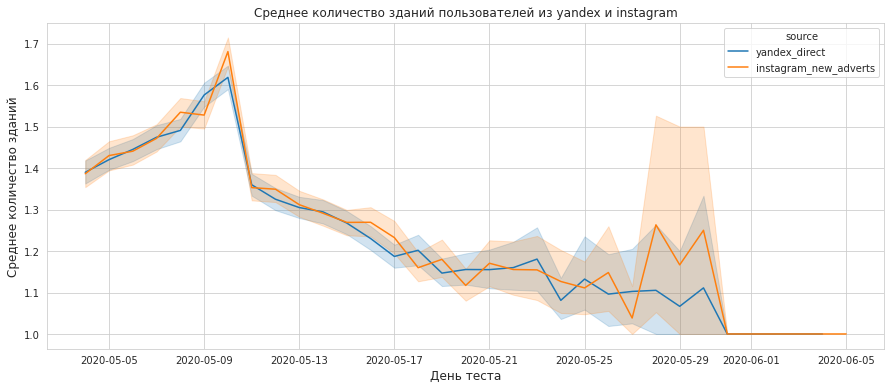

In [40]:
data = (buildings_per_user
        .loc[(buildings_per_user['source']=='yandex_direct')
             |(buildings_per_user['source']=='instagram_new_adverts')])
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data, x='event_datetime', y='event', hue='source', estimator='mean')
plt.xlabel('День теста', size=12)
plt.ylabel('Среднее количество зданий', size=12)
plt.title('Среднее количество зданий пользователей из yandex и instagram', size=12)
plt.show()

Графики очень похожие, только в конце дисперсия возрастает из-за уменьшения количества пользователей. Следовательно различия в динамике постройки зданий для данных 2 источников отсутствуют. На данном основании можно не отдавать предпочтение одному из этих источников.

## Выводы об эффективности источников привлечения.

Выше были сделаны выводы о количестве пользователей по источникам привлечения, а также о стоимости привлечения пользователей. Также была проверена гипотеза о различиях в среднем количестве построенных зданий между пользователями из разных источников привлечения.

Посчитаем еще несколько характеристик и добавим их в сводную таблицу.

In [41]:
number_of_buildings = (events_and_source
                       .loc[events_and_source['event']=='building']
                       .groupby(['source'])
                       .agg({'user_id':'count'})
                       .reset_index()
                      )
number_of_buildings = number_of_buildings.rename(columns={'user_id':'buildings_cnt'})
active_users = (events_and_source
                       .loc[events_and_source['strategy']!='in_progress']
                       .groupby(['source'])
                       .agg({'user_id':'nunique'})
                       .reset_index()
                      )
active_users = active_users.rename(columns={'user_id':'active_users_cnt'})
display(number_of_buildings, active_users)

,source,buildings_cnt
0,facebook_ads,26131
1,instagram_new_adverts,31815
2,yandex_direct,45032
3,youtube_channel_reklama,24978


,source,active_users_cnt
0,facebook_ads,1150
1,instagram_new_adverts,1466
2,yandex_direct,2042
3,youtube_channel_reklama,1159


In [42]:
sources = costs_per_source.merge(number_of_buildings, on='source', how='left')
sources = sources.merge(active_users, on='source', how='left')
sources['buildings_mean'] = round(sources['buildings_cnt']/sources['users_cnt'], 2)
sources['active_users_percent'] = round(sources['active_users_cnt']*100/sources['users_cnt'], 2)
sources

,source,cost,users_cnt,CAC,buildings_cnt,active_users_cnt,buildings_mean,active_users_percent
0,facebook_ads,2140.905,2726,0.785,26131,1150,9.59,42.19
1,instagram_new_adverts,2161.442,3347,0.646,31815,1466,9.51,43.80
2,yandex_direct,2233.111,4817,0.464,45032,2042,9.35,42.39
3,youtube_channel_reklama,1068.119,2686,0.398,24978,1159,9.30,43.15


Попробуем еще проверить, не заходят ли пользователи из каких-либо источников чаще других.

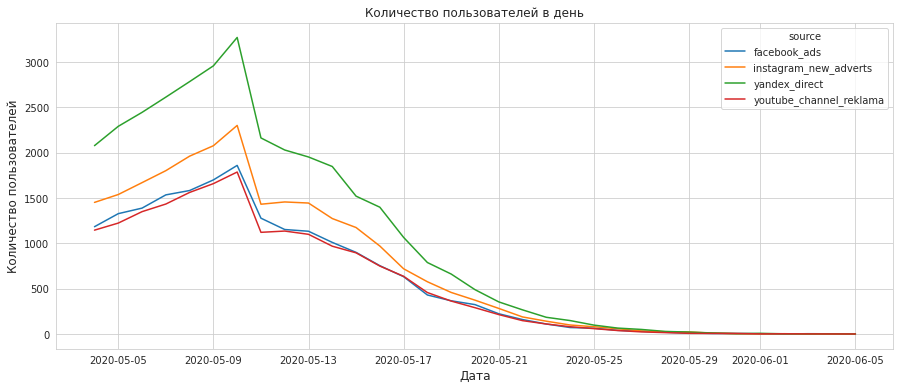

In [43]:
data = (events_and_source[['event_datetime', 'user_id', 'source']]
                  .groupby(['event_datetime', 'source'])
                  .agg({'user_id':'nunique'})
        .reset_index())
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data, x='event_datetime', y='user_id', hue='source')
plt.xlabel('Дата', size=12)
plt.ylabel('Количество пользователей', size=12)
plt.title('Количество пользователей в день', size=12)
plt.show()

Все графики одинаковые, пользователи одинаково активны.

Рекламу планируется показывать на экране постройки здания. По среднему количеству зданий и посещаемости источники показывают одинаковую ценность. Для увеличения посещаемости можно использовать другие их преимущества:
* на youtube меньше всего CAC;
* через яндекс приходит больше всего пользователей;
* через instagram приходит больше всего пользователей, которые заканчивают 1 уровень;
* пользователи из facebook строят зданий больше, чем остальные.

## Выводы и рекомендации.

**Выводы по результатам исследования**

1. Логи игры заполняются верно, нет необходимости в исправлении ошибок.
2. В первые 10 дней виден значительный рост пользователей, к концу месяца он снижается до 0. Аналогичная ситуация с пользовательской активностью.
3. На одного пользователя приходится в среднем 9 событий.
4. Больше всего строится зданий категорий assembly shop и spaceport. При этом магазин все строят на начальном этапе игры.
5. Больше всего зданий строят пользователи, завершающие первый уровень через реализацию проекта. Меньше всего - пользователи, еще не закончившие задания 1 уровня.
6. Больше всего пользователей приносит реклама в Яндексе и в Инстаграм.
7. Самая дешевая реклама на Youtube, далее идут Яндекс и Инстаграм. Самая дорогая реклама - на Facebook.
8. Время завершения уровня не различается в зависимости от способа прохождения, хотя больше пользователей выбирают проходить уровень через победу над врагом.
9. Количество построенных зданий не различается для пользователей, пришедших из Яндекса и из Инстаграм.
10. В instagram больше процент активных пользователей.

**Рекомендации для развития**

1. Основное предпочтение отдать рекламе в яндекс директ, т.к. оттуда приходит больше всего пользователей.
2. Сделать профиль в instagram более привлекательным для целевой аудитории.
3. youtube эффективнее всего с точки зрения бюджета. Следует изучить рекомендации Google по таргетингу, чтобы увеличить охват привлекаемых пользователей.
4. Необходимо оптимизировать рекламную кампанию на facebook, т.к. сейчас CAC здесь самый высокий. Возможно сейчас игра рекламируется среди нецелевой аудитории, и это можно скорректировать. Если улучшения недоступны, следует использовать рекламный бюджет на другой источник.